In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('trimmed_df_2.csv')
print(f"Percent of rows in dataframe with appliances listed: {round((df['Appliances'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")

Percent of rows in dataframe with appliances listed: 81.87%


In [3]:
appliances = []
i = 0

for item in df['Appliances']:
    item_list = str(df['Appliances'][i]).split(", ")
    j = 0
    for item in item_list:
        if item_list[j] not in appliances:
            if item_list[j] != 'nan':
                appliances.append(item)
                j += 1
        else:
            j += 1
    i += 1

appliances_df = df.dropna(subset=['Appliances'])
appliances_df['Baths'] = appliances_df['BathsFull'] + (appliances_df['BathsHalf'] * 0.5)
appliances_df = appliances_df[['Appliances', 'Beds', 'Baths', 'ClosePrice']]

/Users/annariehle/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
appliance_names = []
has_appliance = []
appliance_corr = []

def appliance_column (row):
    if appliance in str(row['Appliances']).split(", "):
        return 1
    else:
        return 0
    
for appliance in appliances:
    appliance_names.append(appliance)
    appliances_df[appliance] = appliances_df.apply(appliance_column, axis=1)
    counts = appliances_df[appliance].value_counts()
    has_appliance.append(round((((counts[1])/appliances_df[appliance].count())*100.00), 2))
    corr = appliances_df[[appliance, 'ClosePrice']].corr()
    appliance_corr.append(corr['ClosePrice'][appliance])
    
appliance_stats_df = pd.DataFrame({"Appliance":appliance_names, "% With":has_appliance, "Close Price Correlation": appliance_corr})
appliance_stats_df = appliance_stats_df[['Appliance', '% With', 'Close Price Correlation']]

In [5]:
print(f"Unique Appliances: {len(appliances)}")

appliance_stats_df = appliance_stats_df.set_index('Appliance')
appliance_stats_df.sort_values('Close Price Correlation', ascending=False)

Unique Appliances: 42


,% With,Close Price Correlation
Appliance,,
Six Burner Stove,5.07,0.424971
Oven - Double,7.37,0.398229
Oven - Wall,11.21,0.376887
Range Hood,15.33,0.352129
Cooktop,12.00,0.309062
Extra Refrigerator / Freezer,5.11,0.244724
Water Heater - High-Efficiency,3.01,0.222832
Humidifier,4.67,0.221531
Icemaker,44.12,0.205913


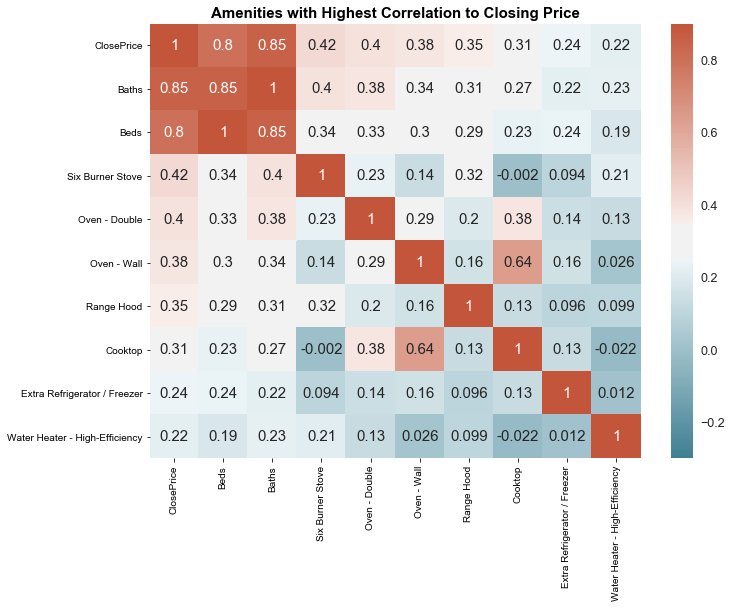

In [6]:
pos_corr_list = ['ClosePrice', 'Beds', 'Baths']

for item in appliance_stats_df.sort_values('Close Price Correlation', ascending=False).index[0:7]:
    pos_corr_list.append(item)

pos_corr = appliances_df[pos_corr_list].corr().sort_values('ClosePrice', ascending=False)
fig, ax = plt.subplots(figsize=(11, 8)) 
sns.set(font_scale=1.25)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(pos_corr, cmap=cmap, vmin=-0.3, vmax=0.9, annot=True)
plt.title('Amenities with Highest Correlation to Closing Price', fontweight='bold')
plt.savefig('Images/Positive Amenity Correlation Matrix.PNG')

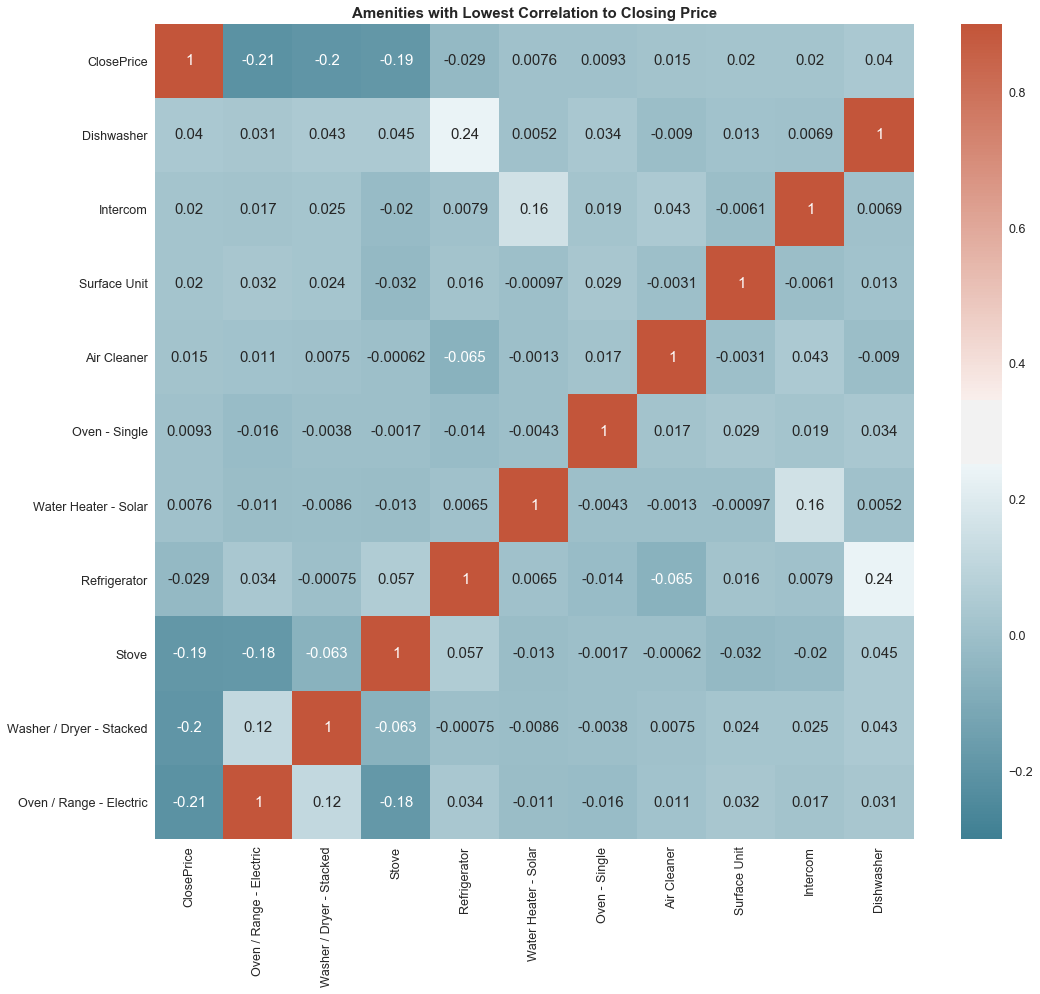

In [7]:
neg_corr_list = ['ClosePrice']

for item in appliance_stats_df.sort_values('Close Price Correlation').index[0:10]:
    neg_corr_list.append(item)

neg_corr = appliances_df[neg_corr_list].corr().sort_values('ClosePrice', ascending=False)
fig, ax = plt.subplots(figsize=(17, 15)) 
sns.set(font_scale=1.25)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(neg_corr, cmap=cmap, vmin=-0.3, vmax=0.9, annot=True)
plt.title('Amenities with Lowest Correlation to Closing Price', fontweight='bold')
plt.savefig('Images/Negative Amenity Correlation Matrix.PNG')

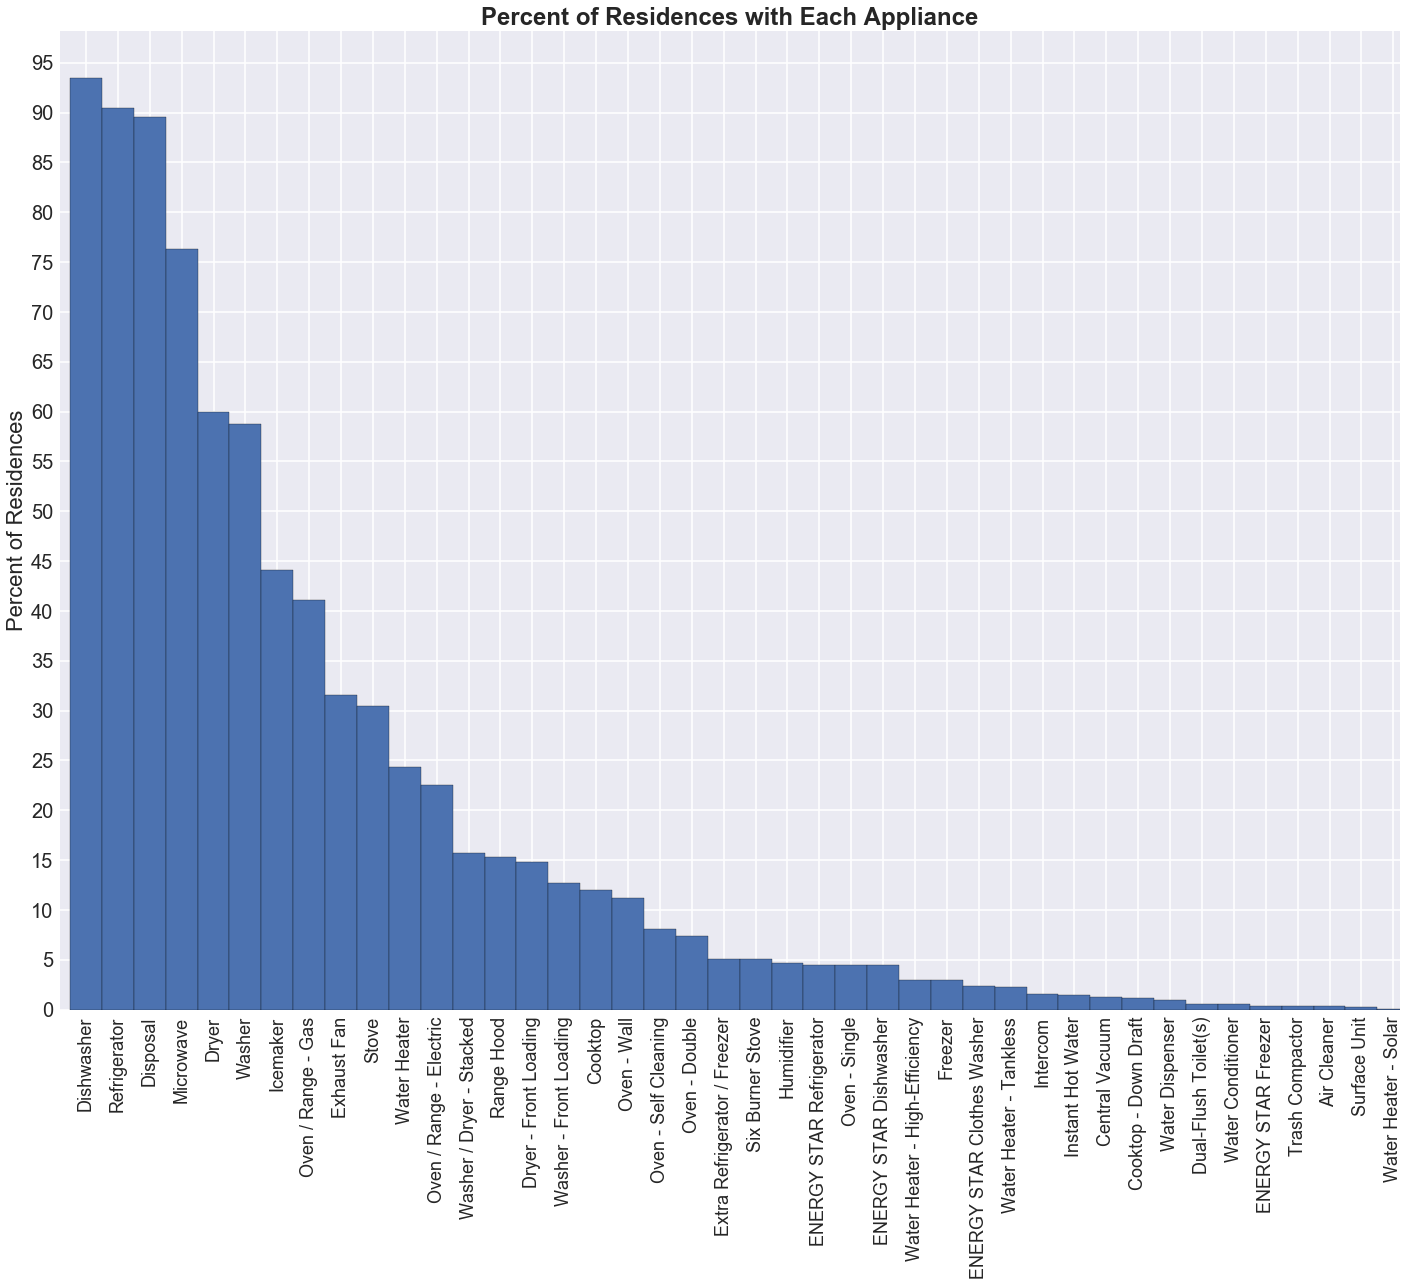

In [8]:
x_values = appliance_stats_df.sort_values('% With', ascending=False).index.values
x_axis = np.arange(len(x_values))
xlabels = x_values
y_values = appliance_stats_df.sort_values('% With', ascending=False)['% With']

fig, ax = plt.subplots(figsize=(24,18))
news_plot = ax.bar(x_axis, y_values, edgecolor='black', width=1.0)

ax.yaxis.set_major_locator(plt.MaxNLocator(20))

for tick in ax.get_yticklabels():
    tick.set_fontsize(20)
    
ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=18)

plt.grid(linewidth=2, alpha=0.8)
ax.set_axisbelow(True)
ax.set_xlim(-0.8, len(x_axis) - 0.8)

ax.set_title('Percent of Residences with Each Appliance', fontsize=24, fontweight='bold')
ax.set_ylabel('Percent of Residences', fontsize=22)
plt.savefig('Images/Residences with Appliances.PNG')

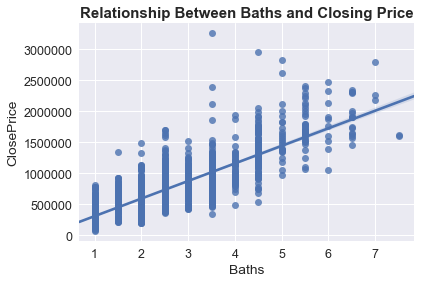

In [9]:
sns.regplot(x=appliances_df['Baths'], y=appliances_df['ClosePrice'])
plt.title("Relationship Between Baths and Closing Price", fontweight='bold')
plt.savefig('Images/Baths and Closing Price.PNG')